# Decision Tree and Random Forest Implementation

In [1]:
# installing necessary libraries
%pip install scikit-learn pandas matplotlib seaborn numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from experiments.experiments import compare_all_models,hyperparameter_sweep,bias_variance_study,learning_curve

## Performance comparison on Wine Dataset

In [3]:
compare_all_models("wine")

,model,impl,dataset,accuracy,f1,auroc
0,dt,custom,wine,1.000000,1.000000,1.000000
1,dt,sklearn,wine,0.972222,0.970962,0.975758
2,rf,custom,wine,1.000000,1.000000,1.000000
3,rf,sklearn,wine,1.000000,1.000000,1.000000
4,et,custom,wine,0.972222,0.974321,1.000000
5,et,sklearn,wine,1.000000,1.000000,1.000000


## Peformance comparsion on Iris Dataset

In [4]:
compare_all_models("iris")

,model,impl,dataset,accuracy,f1,auroc
0,dt,custom,iris,0.933333,0.933333,0.950000
1,dt,sklearn,iris,0.933333,0.933333,0.950000
2,rf,custom,iris,0.933333,0.933333,0.993333
3,rf,sklearn,iris,0.933333,0.933333,0.986667
4,et,custom,iris,0.966667,0.966583,0.993333
5,et,sklearn,iris,0.933333,0.933333,0.990000


In [5]:
learning_curve(model_name="dt",dataset="wine",train_sizes=[0.4,0.5,0.6,0.7,0.8,0.9],impl="custom")

,train_fraction,model,impl,dataset,accuracy,f1,auroc
0,0.4,dt,custom,wine,0.933333,0.937322,0.948148
1,0.5,dt,custom,wine,0.888889,0.891667,0.914141
2,0.6,dt,custom,wine,0.954545,0.954751,0.971065
3,0.7,dt,custom,wine,0.880000,0.879902,0.921678
4,0.8,dt,custom,wine,0.931034,0.936364,0.955556
5,0.9,dt,custom,wine,0.875000,0.860965,0.890427


In [6]:
hyperparameter_sweep(model_name="dt",dataset="iris",impl="sklearn",param_name="min_samples_split",param_values=[5,10,25,30,50,100,150,200])

,model,impl,dataset,param,value,accuracy,f1,auroc
0,dt,sklearn,iris,min_samples_split,5,0.966667,0.966583,0.971667
1,dt,sklearn,iris,min_samples_split,10,0.966667,0.966583,0.971667
2,dt,sklearn,iris,min_samples_split,25,0.966667,0.966583,0.971667
3,dt,sklearn,iris,min_samples_split,30,0.966667,0.966583,0.971667
4,dt,sklearn,iris,min_samples_split,50,0.933333,0.933333,0.966667
5,dt,sklearn,iris,min_samples_split,100,0.666667,0.555556,0.833333
6,dt,sklearn,iris,min_samples_split,150,0.333333,0.166667,0.500000
7,dt,sklearn,iris,min_samples_split,200,0.333333,0.166667,0.500000


In [7]:
# bias-variance study
#bias_variance_study(model_name="rf",dataset="wine",param_name="n_estimators",param_values=[5,10,20,30,40,50,60,70,80,90,100])

## Comparison Across Custom Models

In [11]:
import os
def plot_across_custom_models(
    param_name,
    param_values,
    train_sizes=None,
    datasets=["iris", "wine"],
    save_dir="graphs-charts/across-custom"
):
    """
    Plot DT/RF/ET comparison for a given hyperparameter.
    """

    models = ["dt", "rf", "et"]
    colors = {"dt": "red", "rf": "blue", "et": "green"}
    metrics = ["accuracy", "f1", "auroc"]

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f"Effect of {param_name}", fontsize=16)

    for row, dataset in enumerate(datasets):

        for model in models:

            df = hyperparameter_sweep(
                model,
                dataset,
                param_name,
                param_values,
                train_sizes=train_sizes,
                impl="custom"
            )

            for col, metric in enumerate(metrics):

                ax = axes[row, col]

                ax.plot(
                    df["value"],
                    df[metric],
                    label=model.upper(),
                    color=colors[model],
                    marker="o"
                )

                ax.set_xlabel(param_name)
                ax.set_ylabel(metric)
                ax.set_title(f"{dataset.upper()} - {metric}")

                ax.grid(True)

    # Legends
    for ax in axes.flatten():
        ax.legend()

    plt.tight_layout()
    plt.subplots_adjust(top=0.92)

    filename = f"{param_name}.png"
    path = os.path.join(save_dir, filename)

    plt.savefig(path, dpi=300)
    plt.show()

    print(f"Saved: {path}")


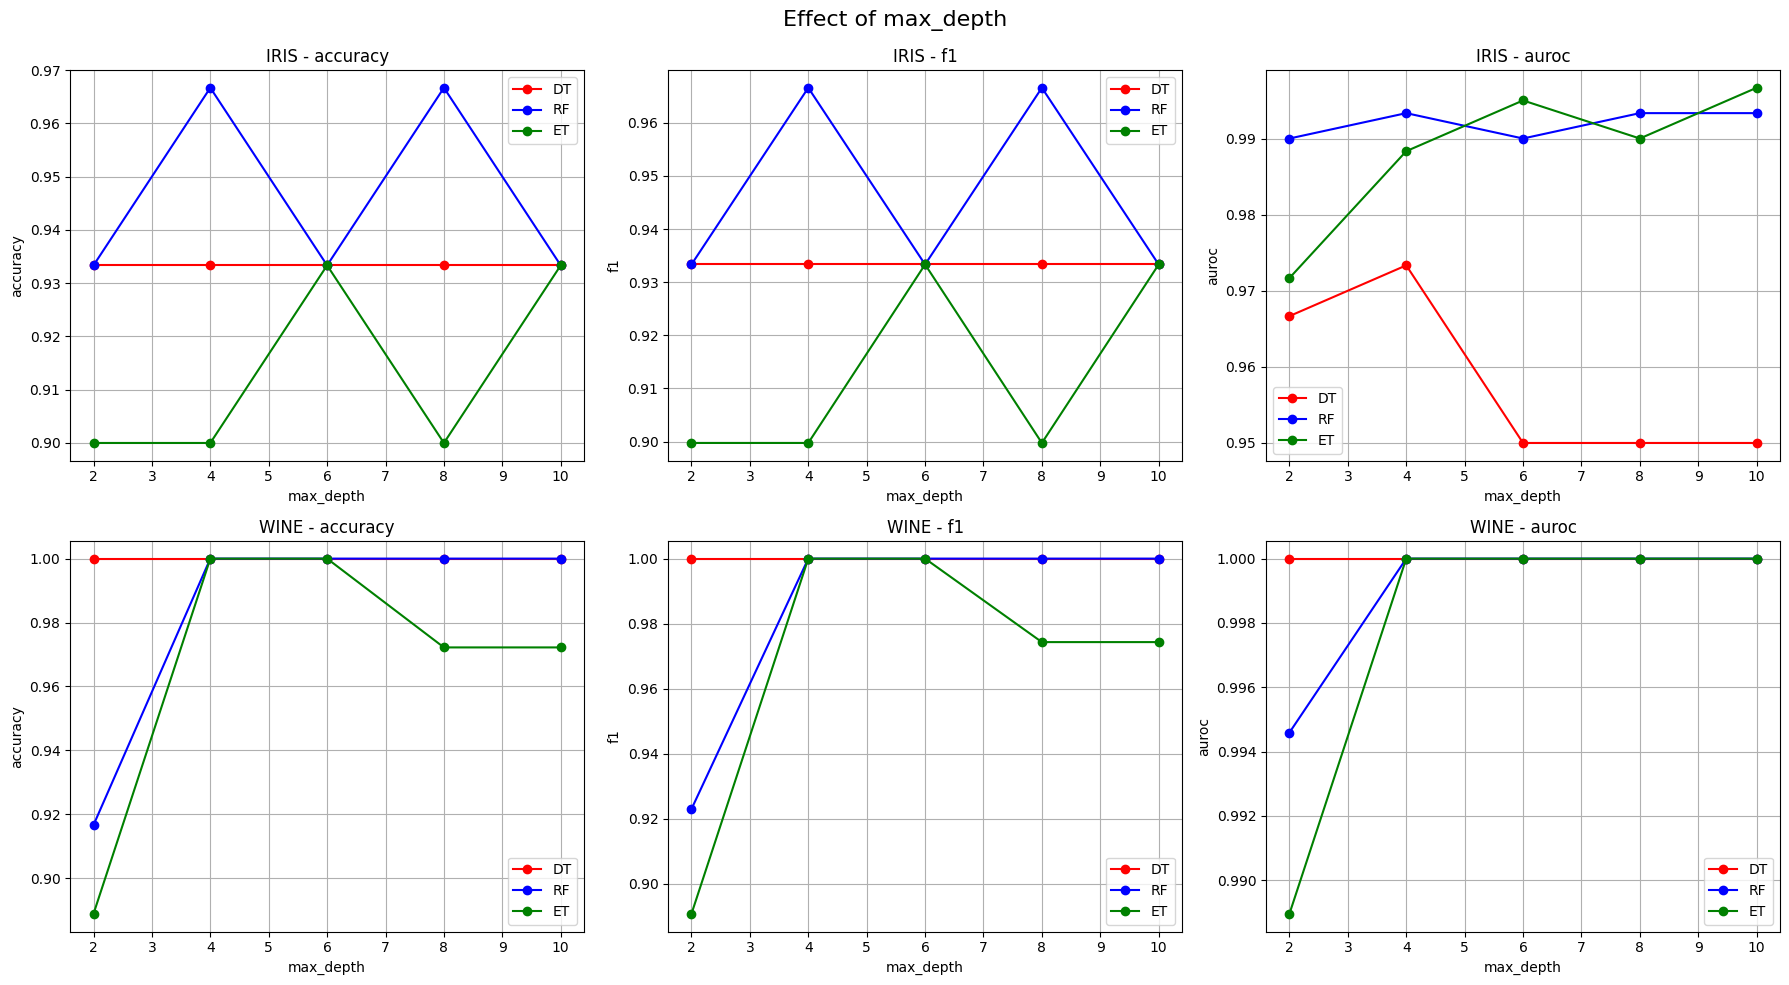

Saved: graphs-charts/across-custom\max_depth.png


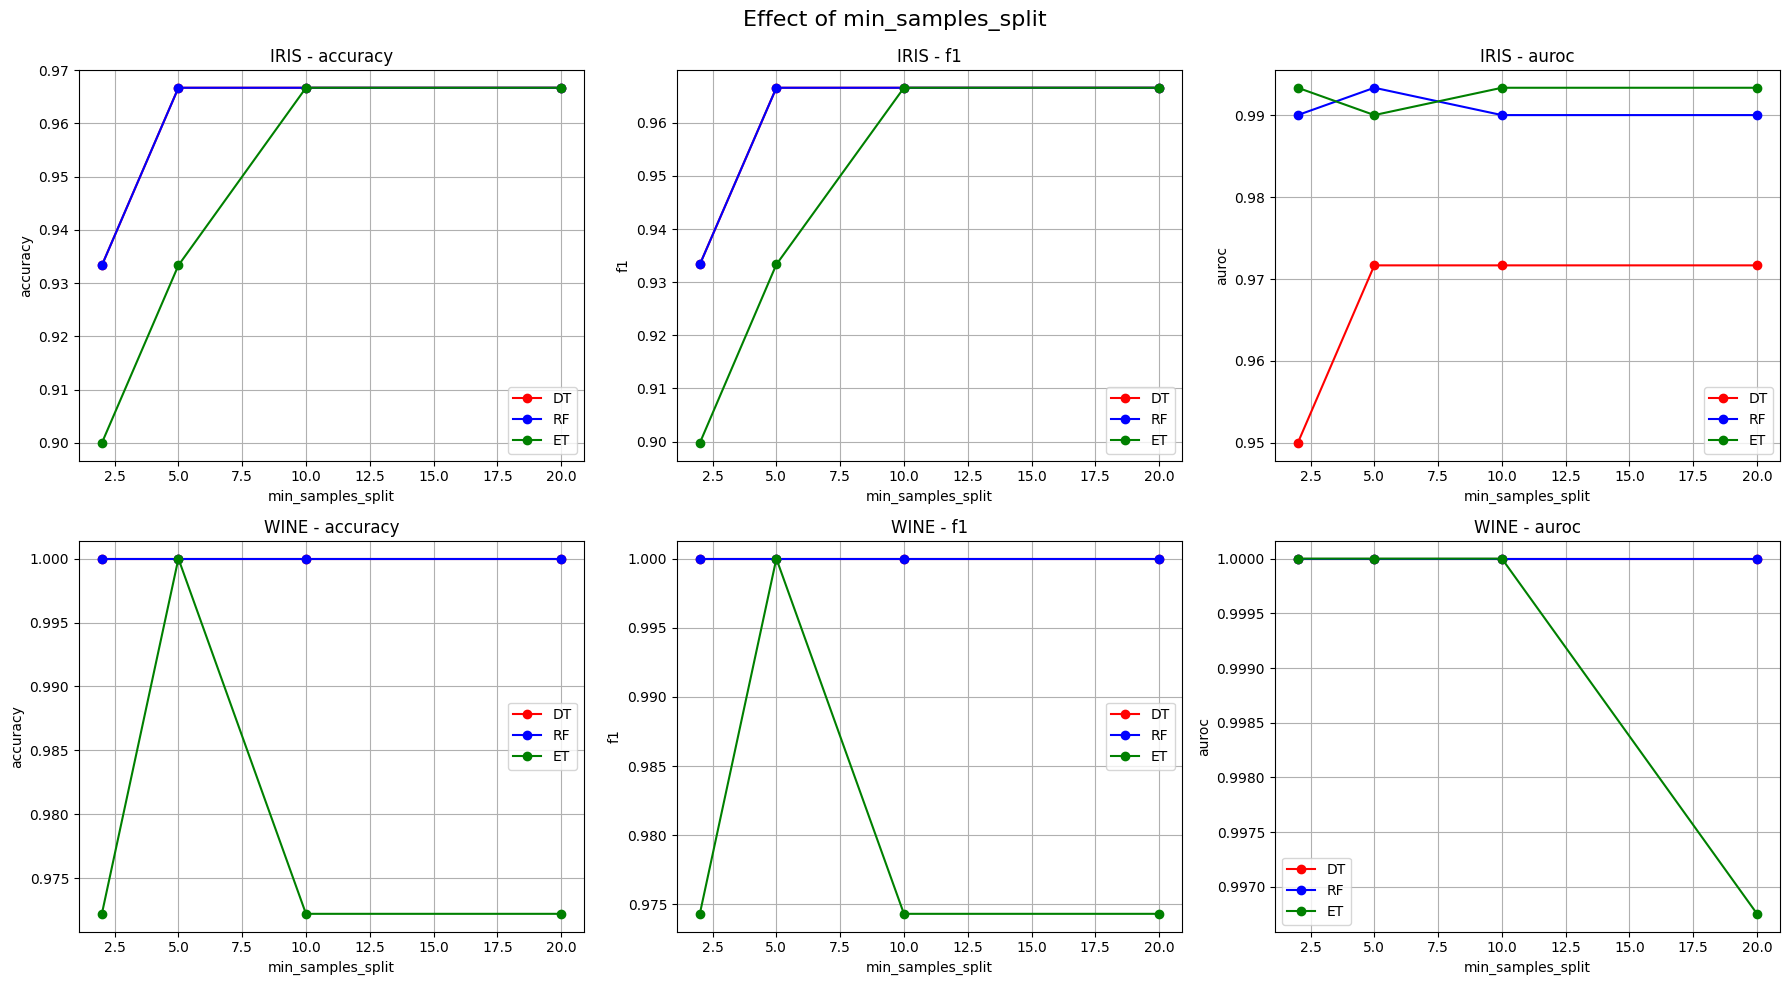

Saved: graphs-charts/across-custom\min_samples_split.png


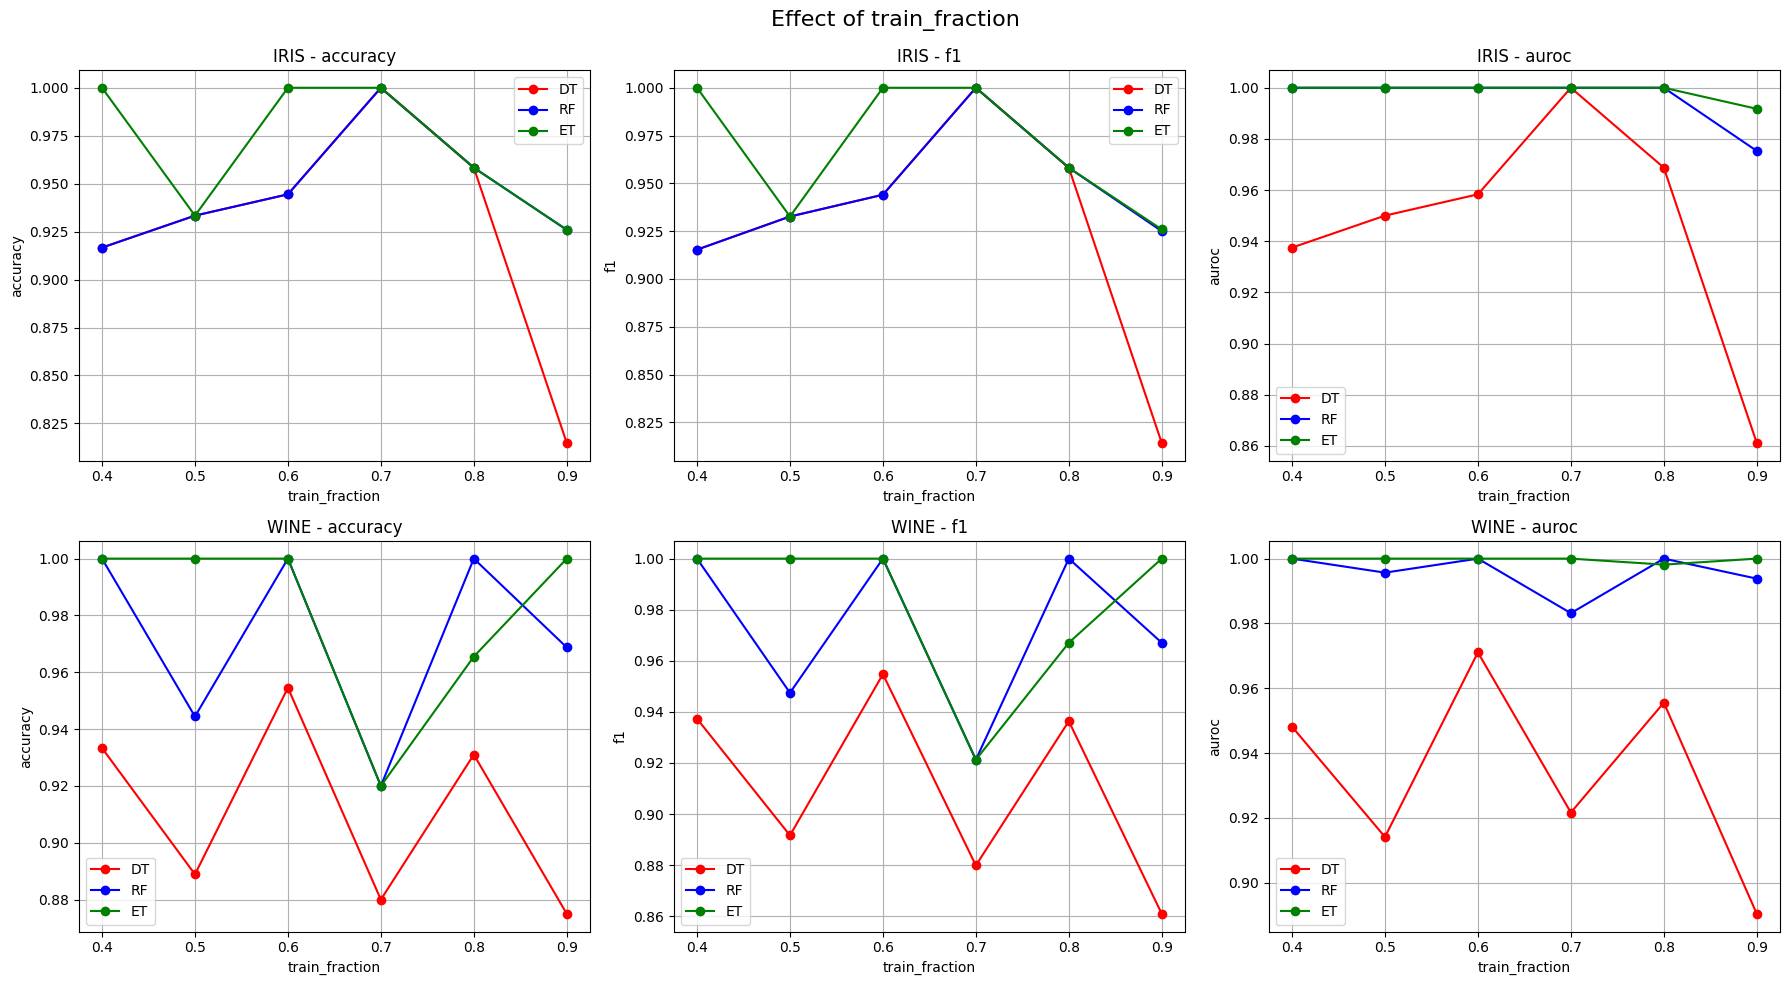

Saved: graphs-charts/across-custom\train_fraction.png


In [13]:
# max_depth
plot_across_custom_models(
    "max_depth",
    [2, 4, 6, 8, 10, None]
)

# # min_samples_split
plot_across_custom_models(
    "min_samples_split",
    [2, 5, 10, 20]
)

# learning curve
plot_across_custom_models(
    param_name="train_fraction",
    param_values=None,
    train_sizes=[0.4,0.5,0.6,0.7,0.8,0.9]
)


### Custom vs Sklearn Comparison

In [18]:
def plot_custom_vs_sklearn(
    model,
    param_name,
    param_values,
    train_sizes=None,
    datasets=["iris", "wine"],
    save_dir="graphs-charts/custom-sklearn"
):
    """
    Plot Custom vs Sklearn comparison.
    """

    metrics = ["accuracy", "f1", "auroc"]

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(
        f"{model.upper()} - Custom vs Sklearn ({param_name})",
        fontsize=15
    )

    colors = {
        "custom_iris": "blue",
        "sklearn_iris": "black",
        "custom_wine": "green",
        "sklearn_wine": "red"
    }

    for dataset in datasets:

        for impl in ["custom", "sklearn"]:

            df = hyperparameter_sweep(
                model,
                dataset,
                param_name,
                param_values,
                train_sizes=train_sizes,
                impl=impl
            )

            for i, metric in enumerate(metrics):

                ax = axes[i]

                key = f"{impl}_{dataset}"
                label = f"{impl}-{dataset}"

                ax.plot(
                    df["value"],
                    df[metric],
                    marker="o",
                    color=colors[key],
                    label=label
                )

                ax.set_xlabel(param_name)
                ax.set_ylabel(metric)
                ax.set_title(metric.upper())
                ax.grid(True)

    for ax in axes:
        ax.legend()

    plt.tight_layout()
    plt.subplots_adjust(top=0.88)

    filename = f"{model}_{param_name}.png"
    path = os.path.join(save_dir, filename)

    plt.savefig(path, dpi=300)
    plt.show()

    print(f"Saved: {path}")


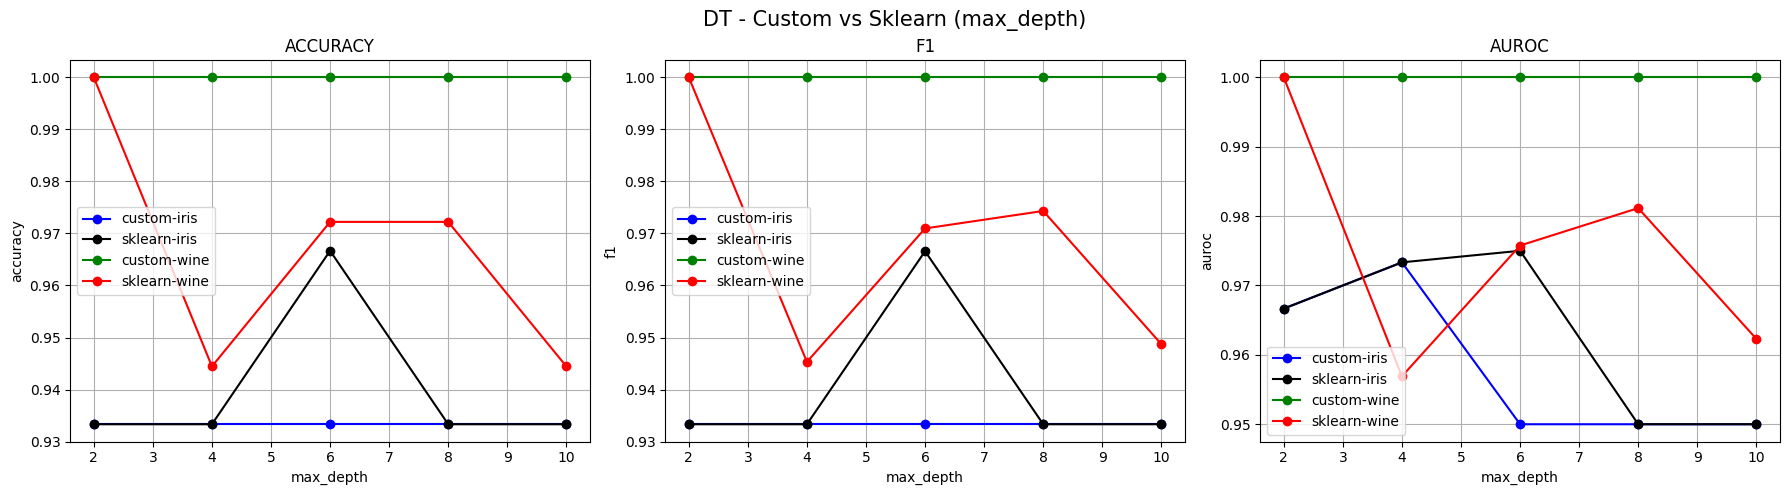

Saved: graphs-charts/custom-sklearn\dt_max_depth.png


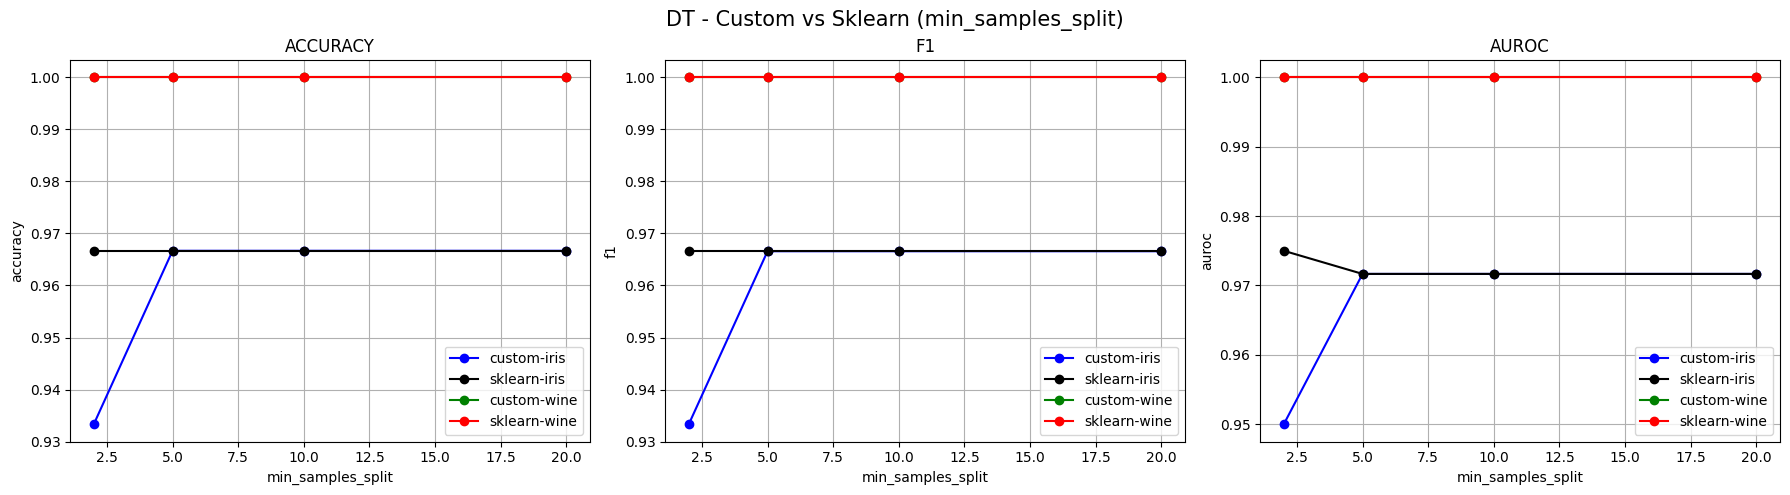

Saved: graphs-charts/custom-sklearn\dt_min_samples_split.png


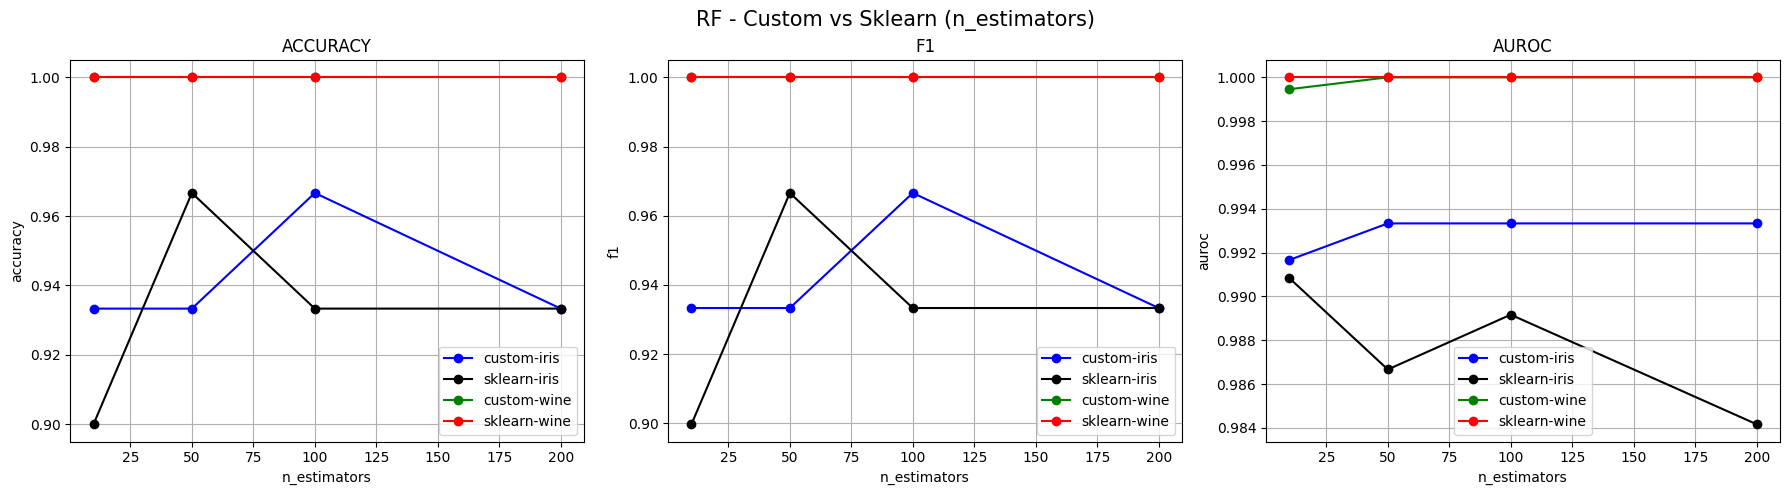

Saved: graphs-charts/custom-sklearn\rf_n_estimators.png


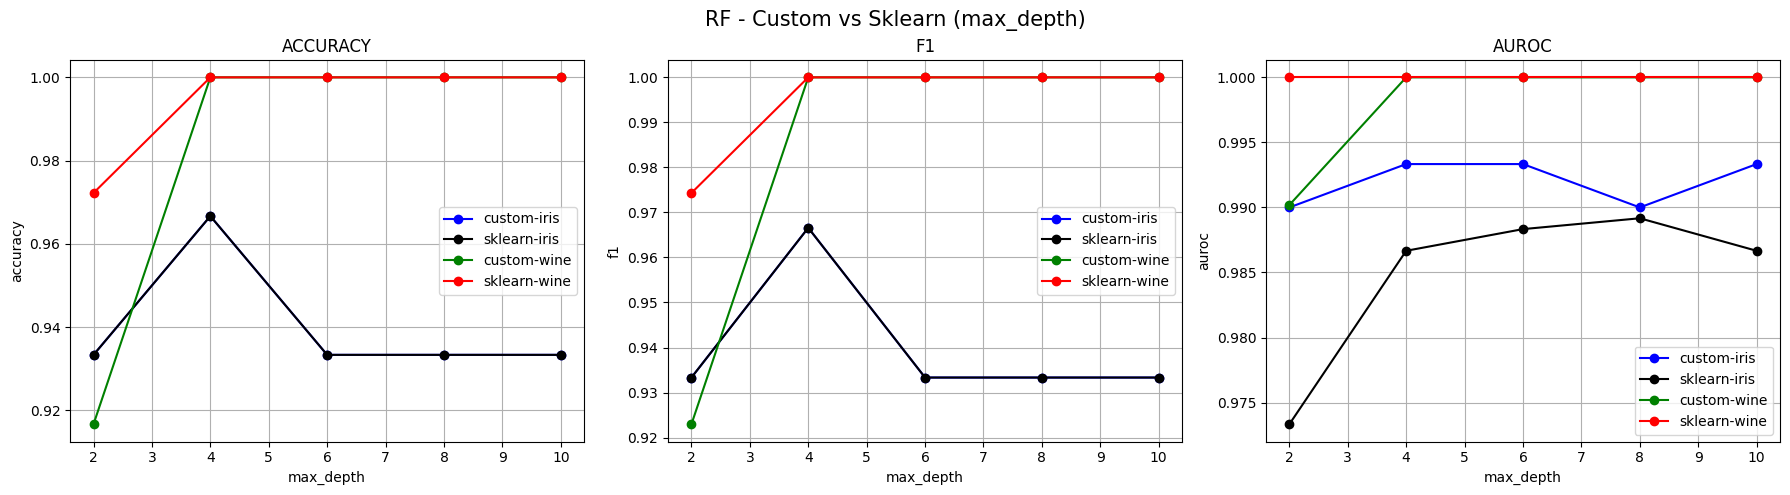

Saved: graphs-charts/custom-sklearn\rf_max_depth.png


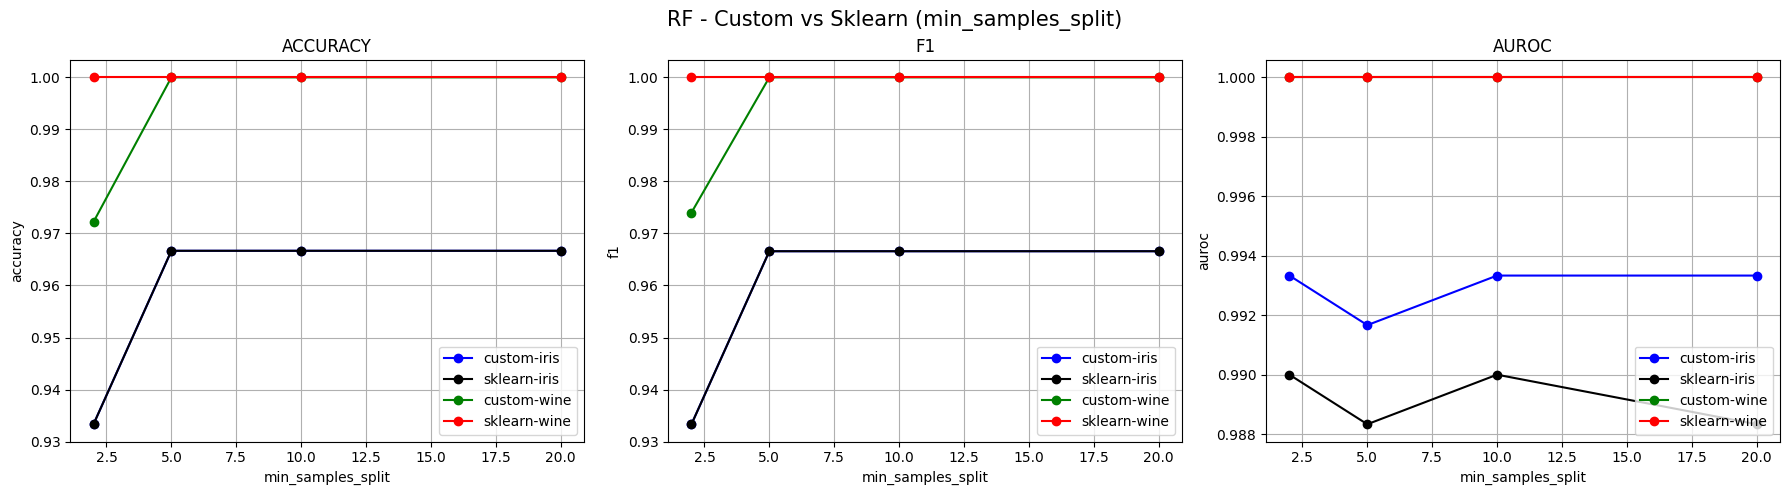

Saved: graphs-charts/custom-sklearn\rf_min_samples_split.png


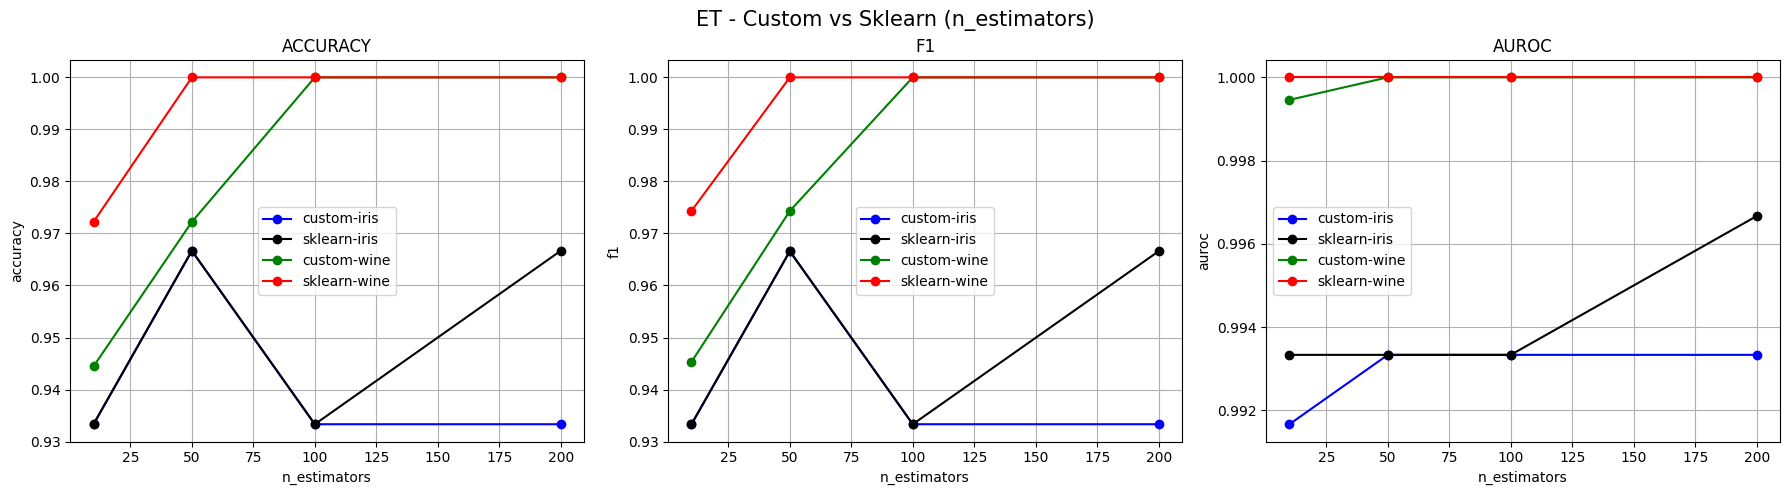

Saved: graphs-charts/custom-sklearn\et_n_estimators.png


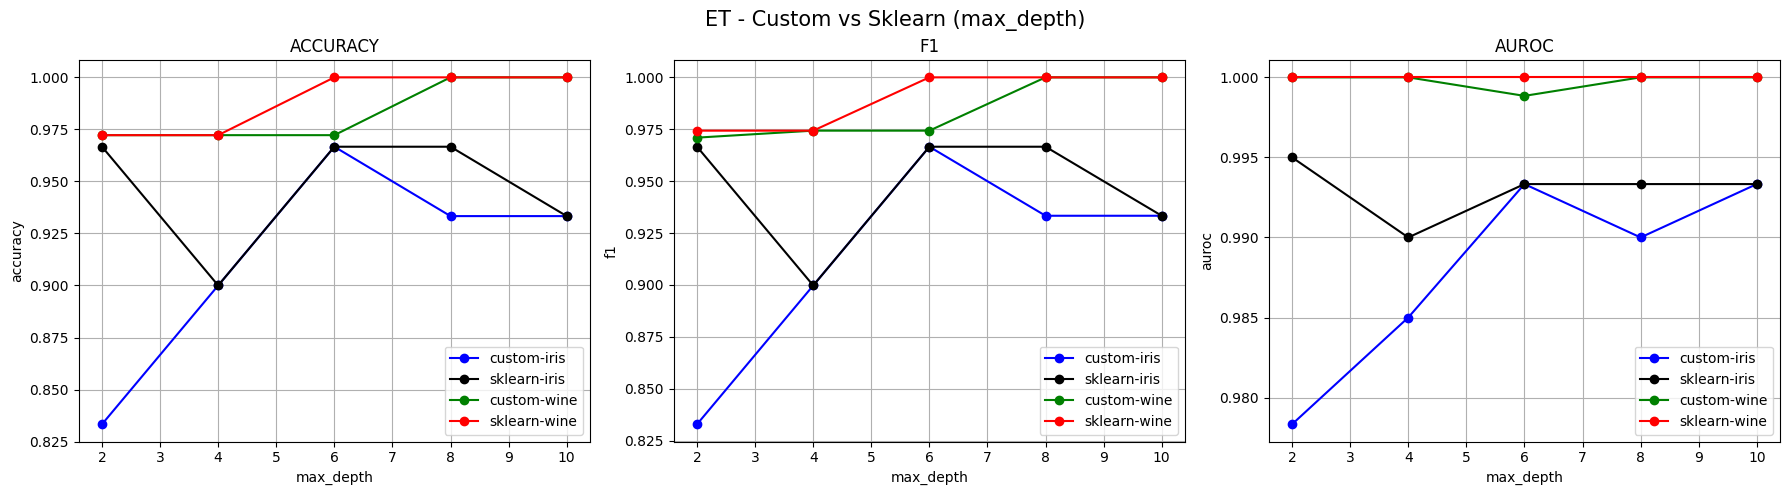

Saved: graphs-charts/custom-sklearn\et_max_depth.png


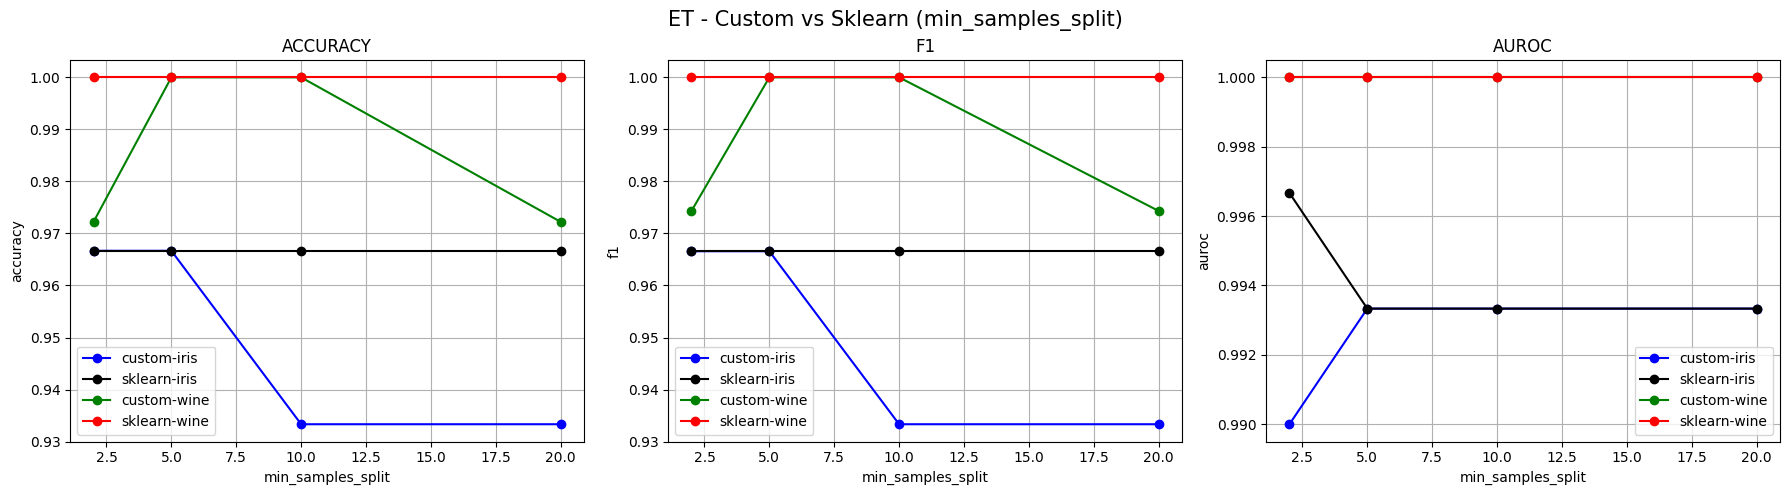

Saved: graphs-charts/custom-sklearn\et_min_samples_split.png


In [19]:
# DT
plot_custom_vs_sklearn(
    "dt",
    "max_depth",
    [2, 4, 6, 8, 10, None]
)
plot_custom_vs_sklearn(
    "dt",
    "min_samples_split",
    [2, 5, 10, 20]
)

# RF
plot_custom_vs_sklearn(
    "rf",
    "n_estimators",
    [10, 50, 100, 200]
)
plot_custom_vs_sklearn(
    "rf",
   "max_depth",
    [2, 4, 6, 8, 10, None]
)
plot_custom_vs_sklearn(
    "rf",
    "min_samples_split",
    [2, 5, 10, 20]
)

# ET
plot_custom_vs_sklearn(
    "et",
    "n_estimators",
    [10, 50, 100, 200]
)
plot_custom_vs_sklearn(
    "et",
   "max_depth",
    [2, 4, 6, 8, 10, None]
)
plot_custom_vs_sklearn(
    "et",
    "min_samples_split",
    [2, 5, 10, 20]
)



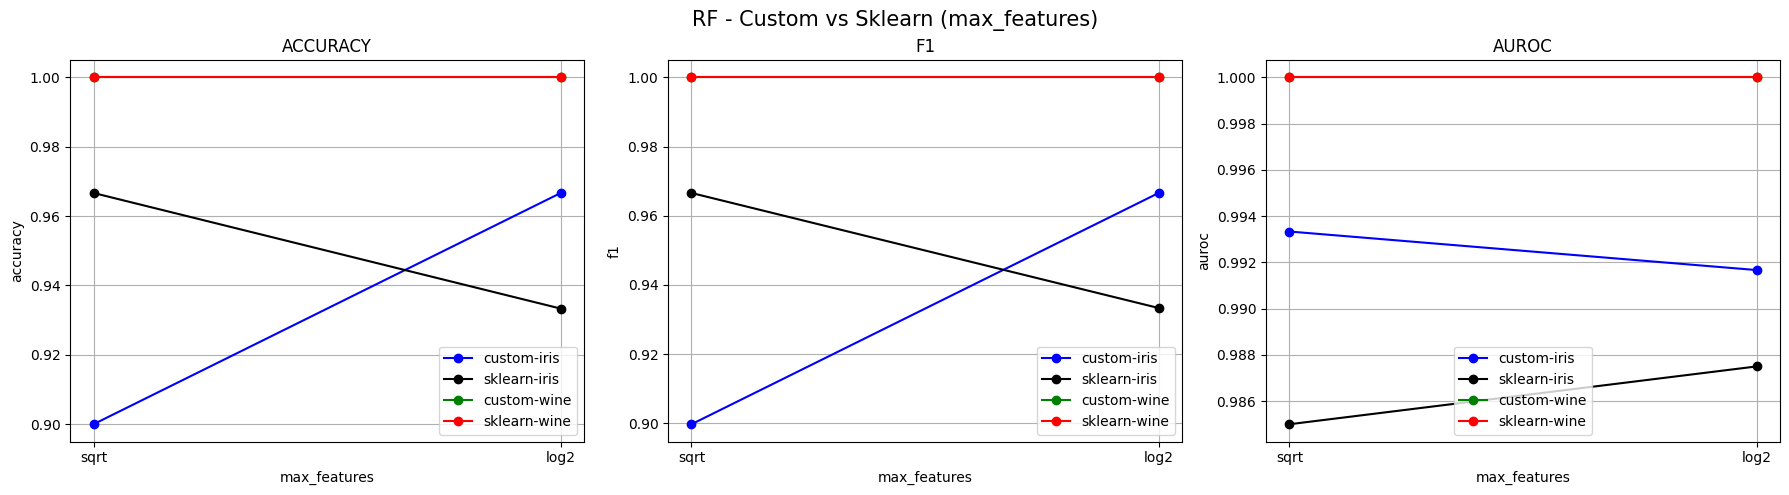

Saved: graphs-charts/custom-sklearn\rf_max_features.png


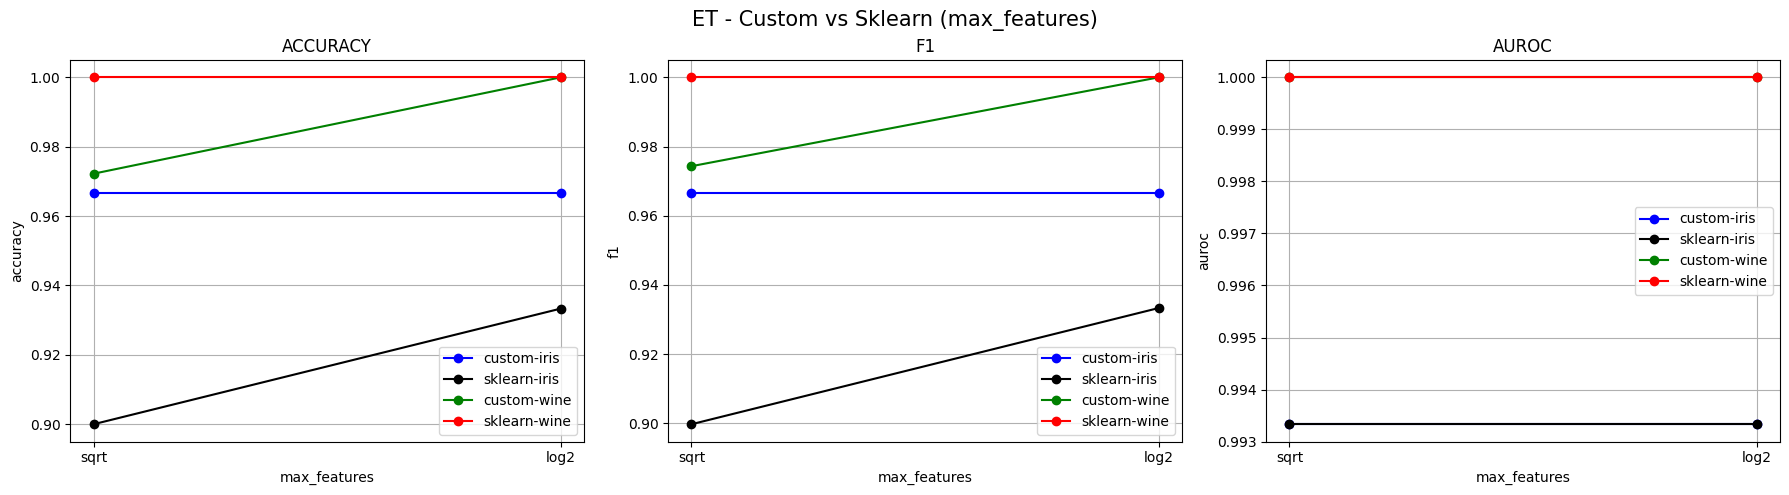

Saved: graphs-charts/custom-sklearn\et_max_features.png


In [25]:
plot_custom_vs_sklearn(
    "rf",
    "max_features",
    ["sqrt", "log2"]
)
plot_custom_vs_sklearn(
    "et",
    "max_features",
    ["sqrt", "log2"]
)

### Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
from data.loader import DatasetLoader
from config import RANDOM_SEED
from experiments.experiments import build_model,get_base_params

def plot_confusion_matrices(
    dataset,
    save_dir="graphs-charts/confusion-matrix"
):
    """
    Plot fused confusion matrices for DT, RF, ET.
    """

    models = ["dt", "rf", "et"]

    loader = DatasetLoader(random_state=RANDOM_SEED)
    X_train, X_test, y_train, y_test = loader.load_and_split(dataset)

    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    fig.suptitle(f"Confusion Matrices - {dataset.upper()}", fontsize=16)

    for col, model_name in enumerate(models):

        for row, impl in enumerate(["custom", "sklearn"]):

            params = get_base_params(model_name)

            model = build_model(
                model_name,
                impl,
                **params
            )

            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)

            cm = confusion_matrix(y_test, y_pred)

            ax = axes[row, col]

            sns.heatmap(
                cm,
                annot=True,
                fmt="d",
                cmap="Blues",
                ax=ax,
                cbar=False
            )

            title = f"{impl.upper()} {model_name.upper()}"
            ax.set_title(title)

            ax.set_xlabel("Predicted")
            ax.set_ylabel("True")

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

    filename = f"{dataset}.png"
    path = os.path.join(save_dir, filename)

    plt.savefig(path, dpi=300)
    plt.show()

    print(f"Saved: {path}")


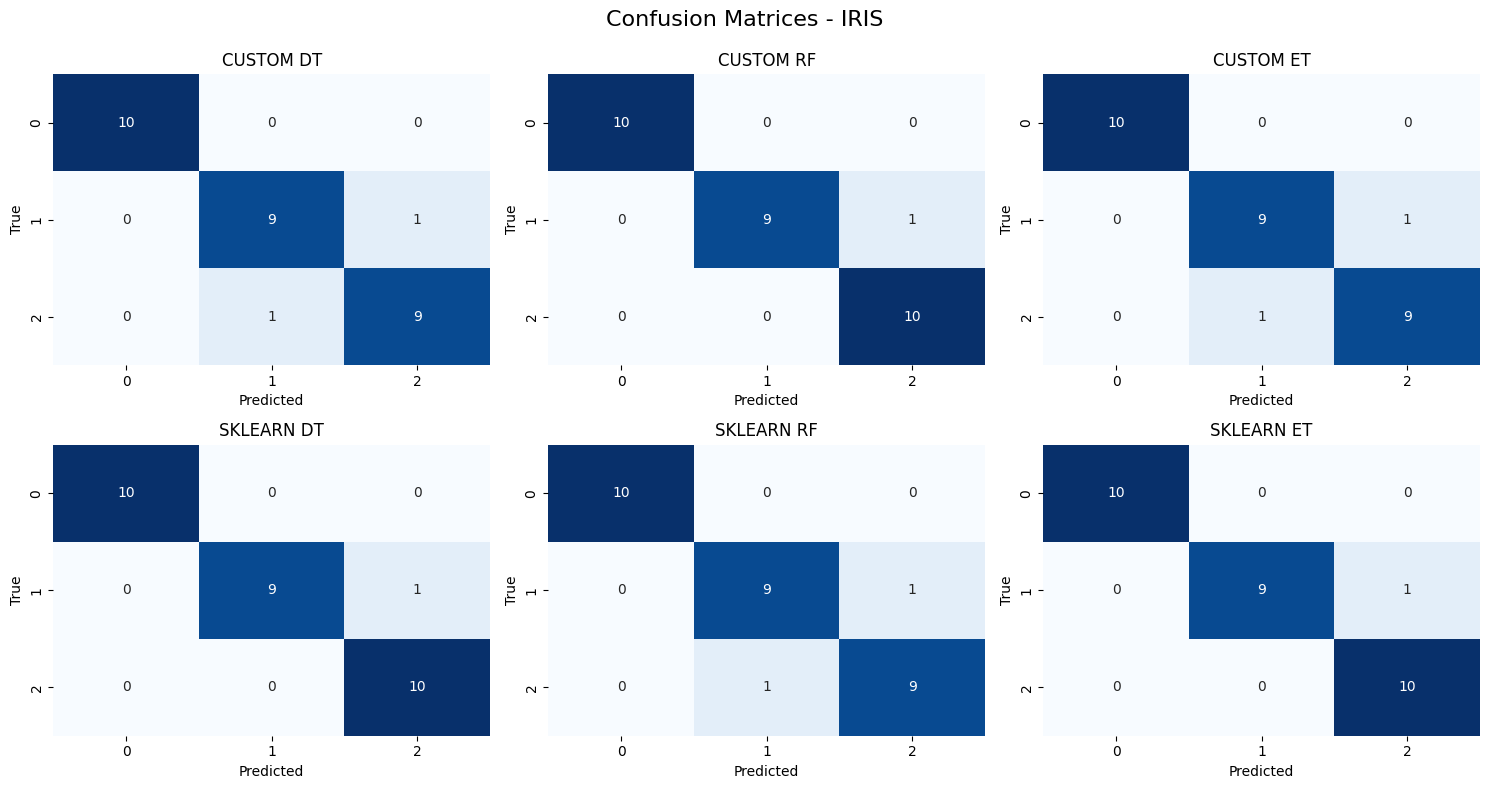

Saved: graphs-charts/confusion-matrix\iris.png


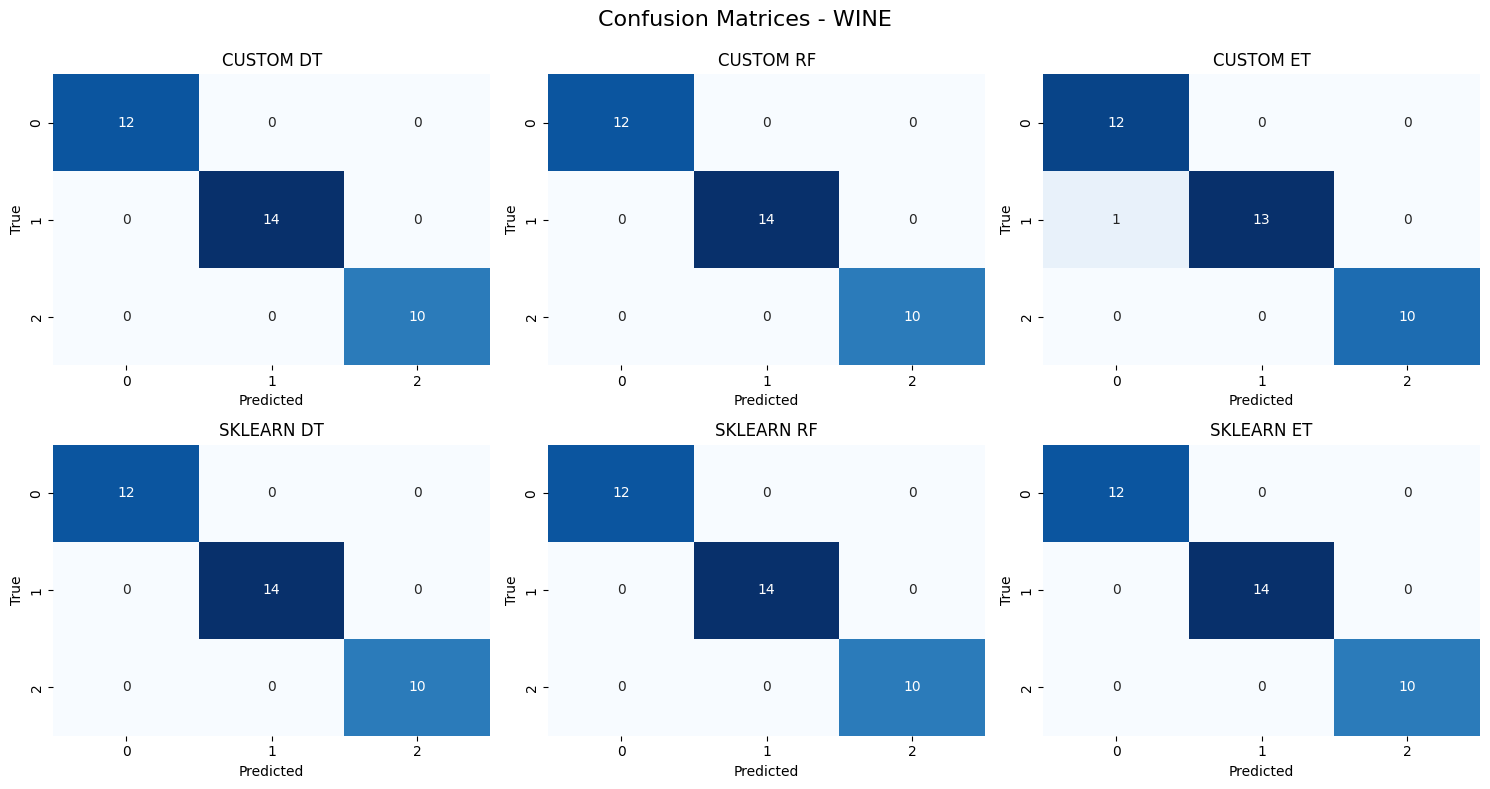

Saved: graphs-charts/confusion-matrix\wine.png


In [21]:
plot_confusion_matrices("iris")
plot_confusion_matrices("wine")
